In [3]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Importo las funciones necesarias para dibujar el cuarto del robot
import robot_room as robot

# Vamos a utilizar numpy a lo largo de la presentación
import numpy as np

# Un parentesis antes de comenzar
## Ejemplo de una diferencia entre numpy arrays y listas

In [8]:
# Comentar descomentar 2da linea y ver diferencias
my_list = [1, 2, 3, 4, 5]
# my_list = np.array([1, 2, 3, 4, 5])
print("Imprimo lista/array:",my_list)

my_list_frac = my_list[3:] # .copy()
print("Fracción de lista/array:",my_list_frac)

# Modifico elemento de la lista/array
my_list_frac[0] = 9
print("Fracción de lista/array modificado:",my_list_frac)
print("¿Que pasa con la lista/array completa?:",my_list)

Imprimo lista/array: [1, 2, 3, 4, 5]
Fracción de lista/array: [4, 5]
Fracción de lista/array modificado: [9, 5]
¿Que pasa con la lista/array completa?: [1, 2, 3, 4, 5]


# Localización

* El robot se encuentra en un pasillo circular donde solo puede avanzar
* El robot tiene un mapa del lugar (Conoce exactamente donde estan ubicadas las puertas)
* Es ubicado en una posición inicial que desconoce
* Puede observar si hay o no a su derecha una puerta
* En función de avanzar y observar debe determinar en la menor cantidad de iteraciones su posición


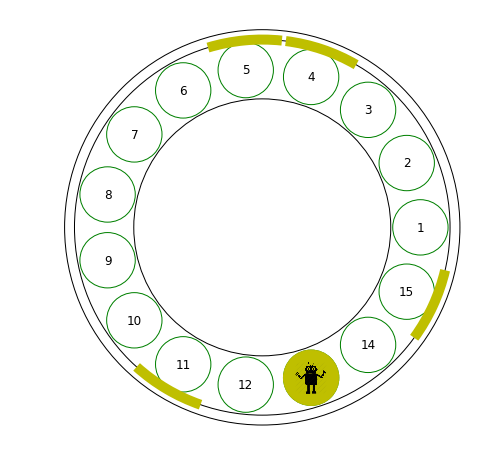

In [12]:
# Defino un arreglo con la posición de las puertas
doors = np.array([4, 5,11,15])
# Cantidad de posiciones posibles para el robot
N = 15
# Defino la posición inicial del robot en forma aleatoria.
initial_loc = np.random.randint(1, N+1)
# Grafico el cuarto del robot
robot.plot_robot_room(loc = initial_loc, N=N, doors = doors, figsize = (8,8))

# ¿Dónde esta el robot?

* El robot no observó su entorno aún
* Estado de máxima confusión

¿Cual es la probabilidad de que el robot se encuentre en la posición 1?

# Variable aleatoria (Definición y notación)
- Mapeo de los posibles resultados del experimento en el eje real.

Definimos $S$ como la variable aleatoria que describe el posición del robot.
- Si el robot esta en la posicion 1 diremos que la variable aleatoria $S$ es 1, es decir, $S = 1$
- En forma general si el robot esta en la posicion $k$ escribiremos $S=k$
- La probabilidad de que el robot este en la posición $k-$esima se escribe: $P(S=k)$

# Representación grafica de una V.A
- Caso disceto: Función de masa de probabilidad
- Caso continuo: Función de densidad de probabilidad
- ¿Que es la función de distribución de probabilidad?

**En el caso del robot la función de masa de probabilidad será**:

In [13]:
# Defino un total de N unos
N_ones = np.ones(N)
print(N_ones)
# Lo divido por la cantidad de posibles posiciones
P = N_ones/N
print(P)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
[ 0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667  0.06666667
  0.06666667  0.06666667  0.06666667]


In [14]:
# Importo el paquete para graficar
from matplotlib import pyplot as plt

def plot_bar_chart(P, indexes=None, index_str='$P(S=%s)$' ,title='Función de masa de probabilidad de la posición del robot: $P(S=k)$'):
    N = len(P)
    if indexes is None:
        indexes = np.linspace(1, N, N, dtype = int) # Desde, Hasta, Cantidad, Tipo
    plt.figure(figsize=(20, 5)) # Tamaño del gráfico
    plt.bar(indexes, P, width=0.75, color='b') # Grafico
    plt.title(title)

    # Definición de indices
    string_indexes = [index_str%i for i in indexes]
    plt.xlim([0,N+1])
    plt.xticks(indexes, string_indexes) 
    plt.xticks(rotation=60)
    plt.show()

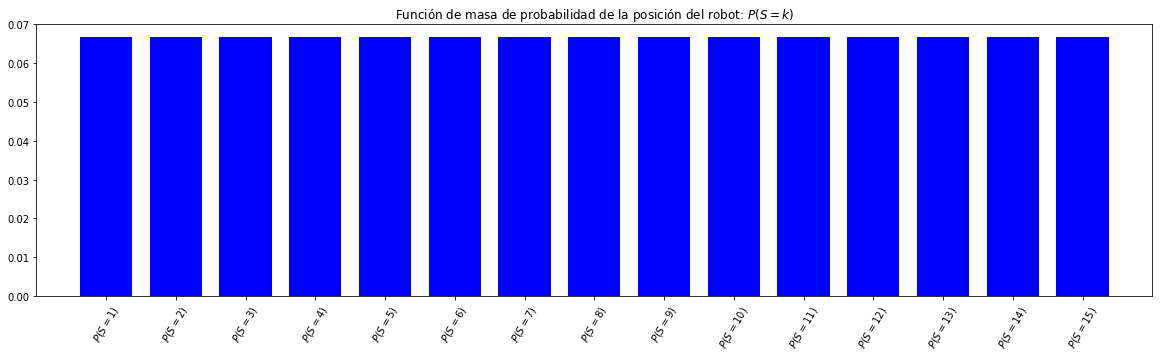

In [15]:
indexes = np.linspace(1, N, N, dtype = int) # Desde, Hasta, Cantidad, Tipo
plot_bar_chart(P, indexes)

La V.A **S** en este caso, tiene una distribución uniforme

Propiedades de las V.A:

$\sum_{i=1}^N P(S=i) = 1$

In [16]:
# La suma de las probabilidades de cada posición es 1
P.sum()

0.99999999999999989

# Modelo Probabilístico
El modelo que describe la posición inicial del robot es simplemente la V.A **S** con distribución uniforme.

## Modelo generativo

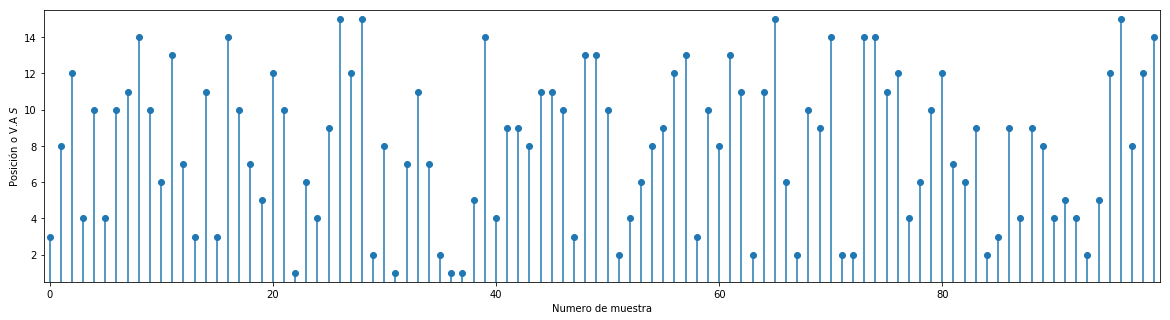

In [22]:
n_samples = 100
initial_locs = np.random.randint(1, N+1, n_samples)
plt.figure(figsize=(20, 5)) # Tamaño del gráfico
plt.stem(initial_locs.T) # ¿Por que lo traspongo?
plt.xlim([-0.5,n_samples-0.5])
plt.ylim([0.5,N+0.5])
plt.xlabel('Numero de muestra')
plt.ylabel('Posición o V.A $S$')
plt.show()

## Histograma

In [23]:
hist_results = np.histogram(initial_locs, bins = N, range=[1,N+1], density=True)
hist_results

(array([ 0.04,  0.09,  0.06,  0.09,  0.04,  0.06,  0.05,  0.07,  0.08,
         0.1 ,  0.08,  0.08,  0.05,  0.07,  0.04]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.]))

In [24]:
hist_results[0].sum()

1.0

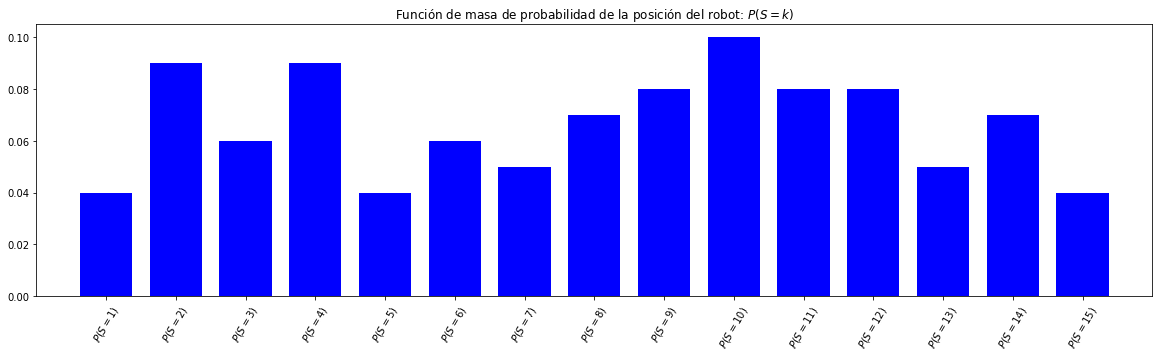

In [25]:
plot_bar_chart(hist_results[0])

¿Por que no se parece demasiado a la función de masa de probabilidad de **S** con la que fue generada?

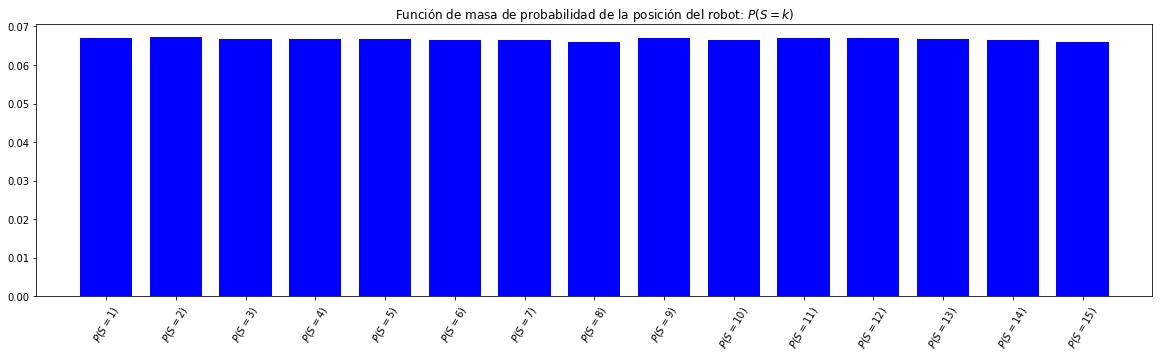

In [26]:
n_samples = 500000
initial_locs_big = np.random.randint(1, N + 1, n_samples)
hist_results_big = np.histogram(initial_locs_big, bins = N, range=[1,N+1], density=True)
plot_bar_chart(hist_results_big[0])

# Probabilidad condicional:
¿Donde esta el robot luego de la primera observación?

**Nota:** Recordemos que a priori el robot conoce la ubicación de las puertas

Dos posibilidades:
- Observa una puerta
- Observa la pared

## Observa una puerta

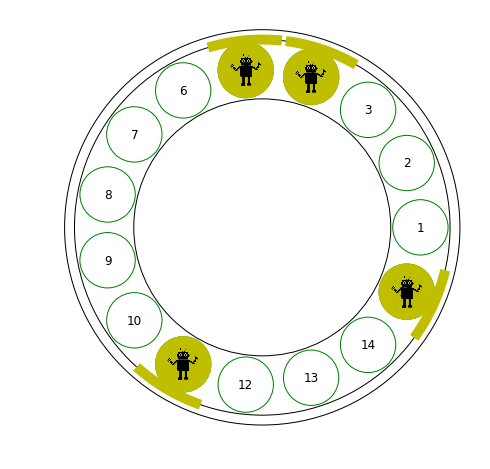

In [27]:
robot.plot_robot_room(loc = doors, N=N, doors = doors, figsize = (8,8))

¿Como se modifica la funcion de masa de probabilidad en este caso?

In [28]:
print('Posiciones puertas:', doors)
P_puerta = np.zeros(N)
print('zeros:',P_puerta)
P_puerta[doors-1] = 1/(len(doors))
print('Probabilidad condicional:',P_puerta)
P_puerta.sum()

Posiciones puertas: [ 4  5 11 15]
zeros: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Probabilidad condicional: [ 0.    0.    0.    0.25  0.25  0.    0.    0.    0.    0.    0.25  0.    0.
  0.    0.25]


1.0

## Notacion
Definimos **X** como la observación que puede tomar dos posibles valores:
{'puerta','pared'}

Ejemplo:

$P(S=4 \quad|\quad X=puerta) = 1/4$

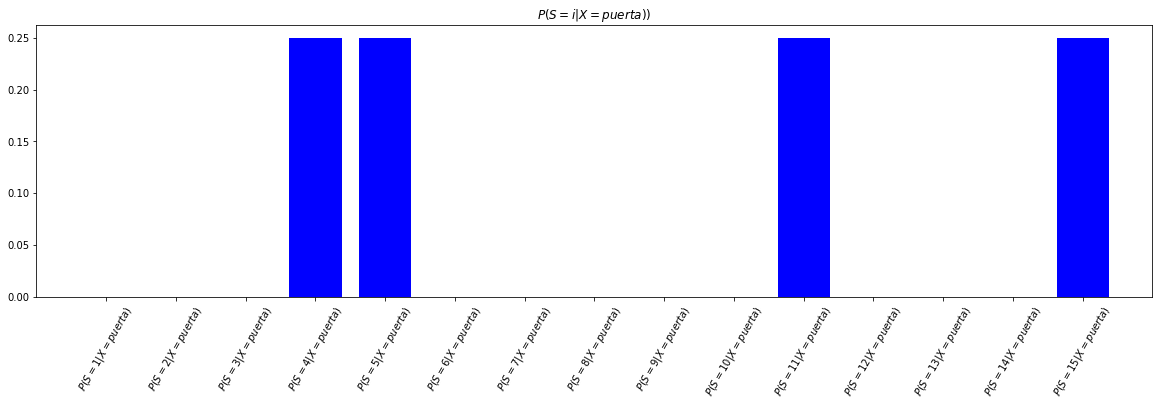

In [30]:
plot_bar_chart(P_puerta, title="$P(S=i|X=puerta))$",index_str='$P(S=%s|X=puerta)$')

## Observa la pared

Posiciones puertas: [ 4  5 11 15]
Probabilidad condicional: [ 0.09090909  0.09090909  0.09090909  0.          0.          0.09090909
  0.09090909  0.09090909  0.09090909  0.09090909  0.          0.09090909
  0.09090909  0.09090909  0.        ]


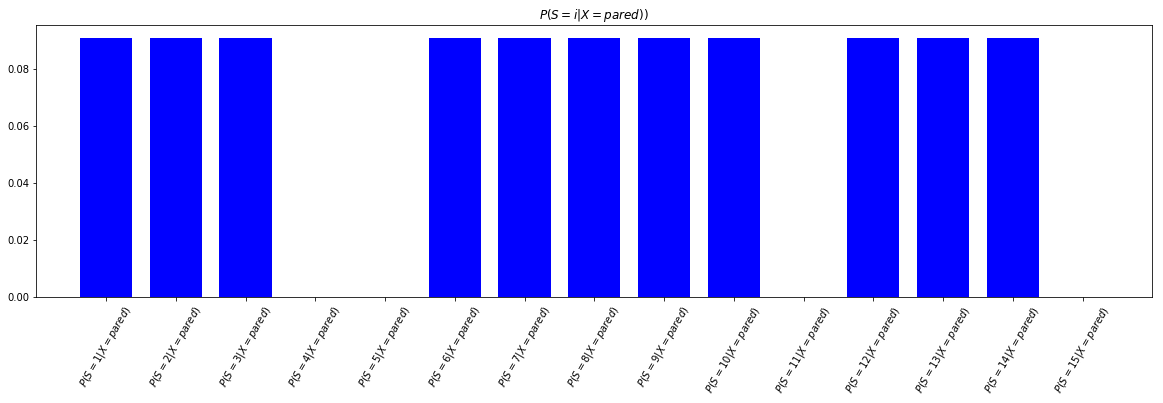

1.0

In [31]:
print('Posiciones puertas:', doors)
P_pared = np.ones(N)/(N-len(doors))
P_pared[doors-1] = 0
print('Probabilidad condicional:',P_pared)
plot_bar_chart(P_pared, title="$P(S=i|X=pared))$",index_str='$P(S=%s|X=pared)$')
P_pared.sum()

En forma general entonces:

$P(S=k|X)$

En este caso S es la posición y X es una puerta o la pared

Por ejemplo: $P(S=4|puerta) = 1/4$

## Likelihood
¿Podemos invertir la condición?

¿Cual es la $P(puerta|S=4)$?

En forma general:

$P(X|S=k)$

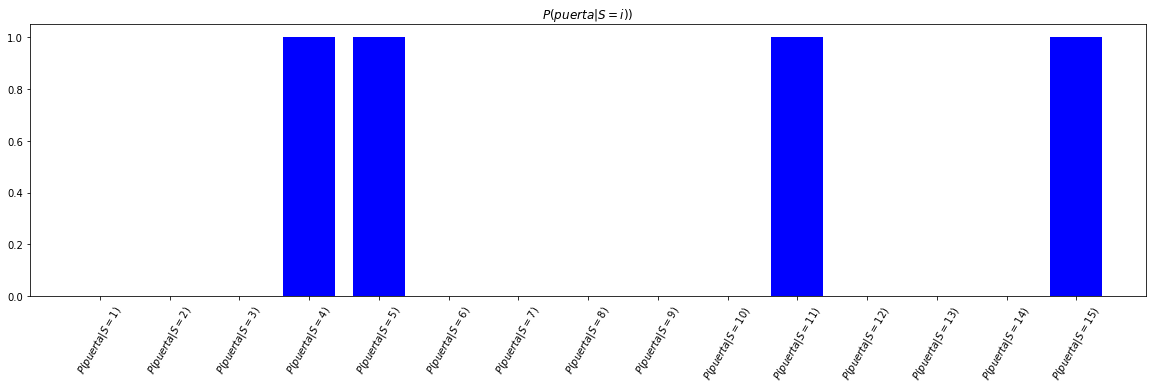

La suma en k es: 4.0


In [32]:
likelihood_puerta = np.zeros(N)
likelihood_puerta[doors-1] = 1
plot_bar_chart(likelihood_puerta, title="$P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')
print('La suma en k es:',likelihood_puerta.sum())

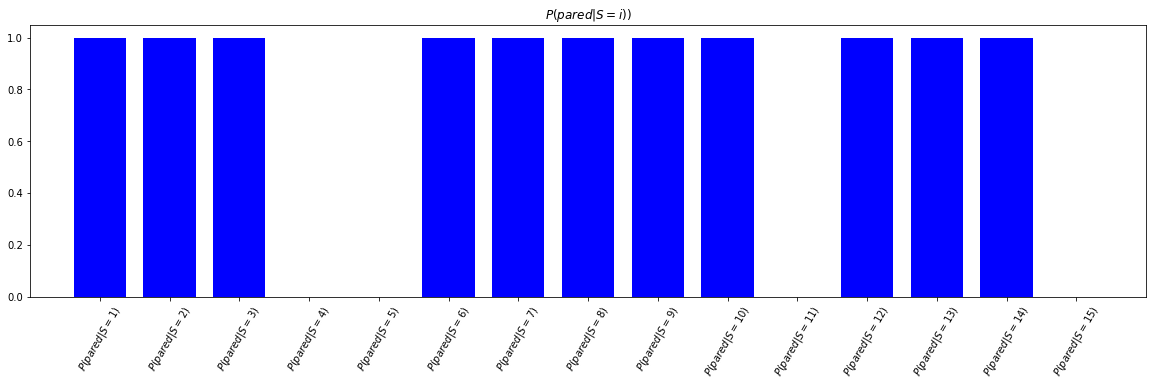

La suma en k es: 11.0


In [33]:
likelihood_pared = np.ones(N)
likelihood_pared[doors-1] = 0
plot_bar_chart(likelihood_pared, title="$P(pared|S=i))$",index_str='$P(pared|S=%s)$')
print('La suma en k es:',likelihood_pared.sum())

### ¿Que pasa si el robot observa con error?
Supongamos que el sensor del robot no es perfecto (Situación mas realista).

¿Como expresamos eso en forma de probabilidad y likelihood?

P(Robot observe una puerta|S = 4) = 0.9

P(Robot observe la pared|S = 4) = 0.1

Notar que ambas probabilidades suman 1

P(Robot observe una pared|S = 3) = 0.8

P(Robot observe una puerta|S = 3) = 0.2


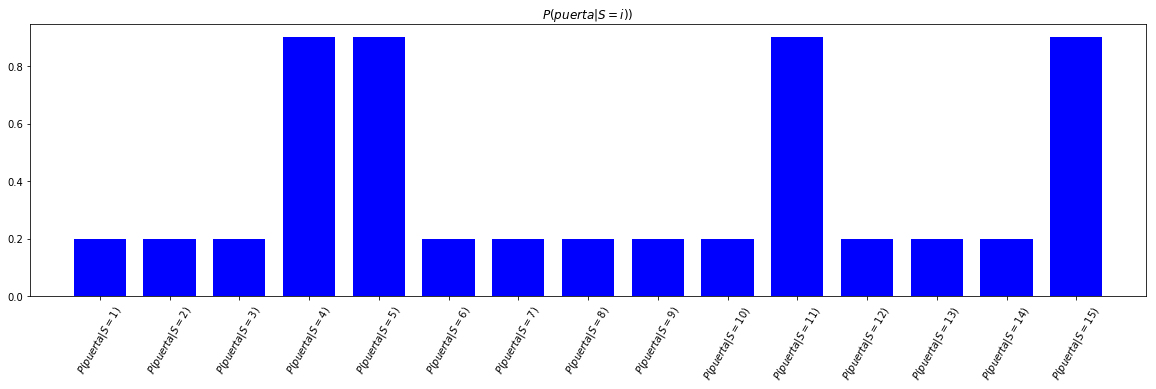

La suma en k es: 5.8


In [34]:
# Esta frente a una puerta
P_puerta_estando_en_puerta = 0.9
P_pared_estando_en_puerta = 0.2
likelihood_puerta_error = np.ones(N)*P_pared_estando_en_puerta
likelihood_puerta_error[doors-1] = P_puerta_estando_en_puerta
plot_bar_chart(likelihood_puerta_error, title="$P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')
print('La suma en k es:',likelihood_puerta_error.sum())

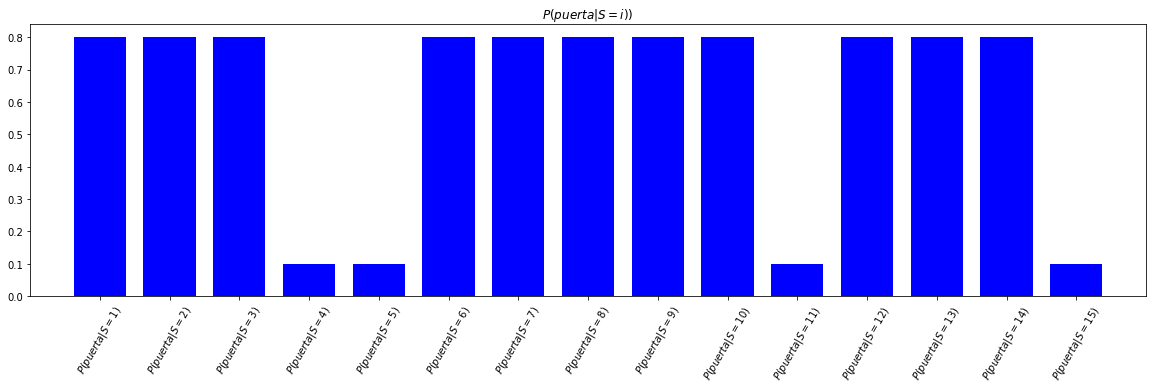

La suma en k es: 9.2


In [35]:
# Esta frente a una pared
P_pared_estando_en_pared = 0.8
P_puerta_estando_en_pared = 0.1
likelihood_puerta_error_2 = np.ones(N)*P_pared_estando_en_pared
likelihood_puerta_error_2[doors-1] = P_puerta_estando_en_pared
plot_bar_chart(likelihood_puerta_error_2, title="$P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')
print('La suma en k es:',likelihood_puerta_error_2.sum())

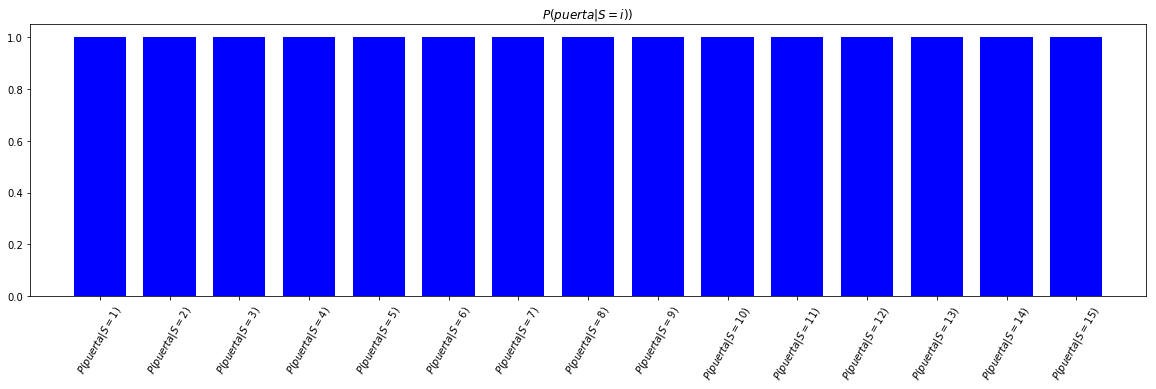

In [36]:
# La suma de todas las opciones del likelihood debe ser 1.0
plot_bar_chart(likelihood_puerta_error+likelihood_puerta_error_2, title="$P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')

# El robot da un paso luego de observar una puerta
Por simplicidad vamos a suponer que no hay error al observar

¿Como queda su función de masa de probabilidad?

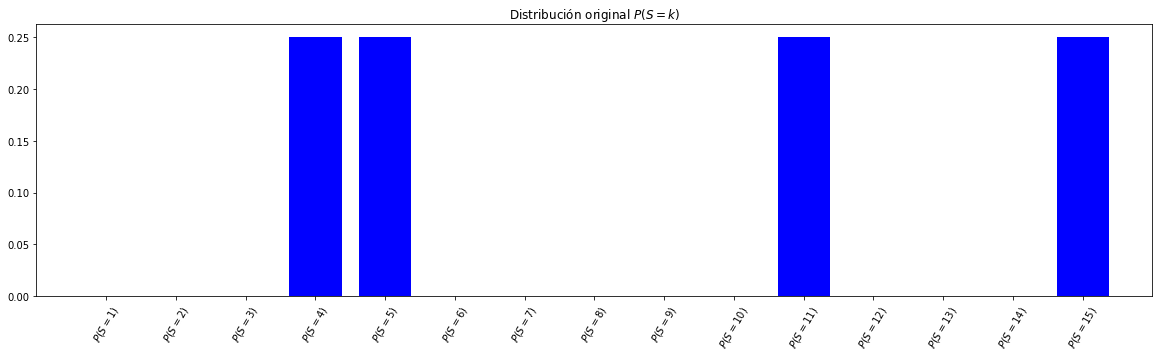

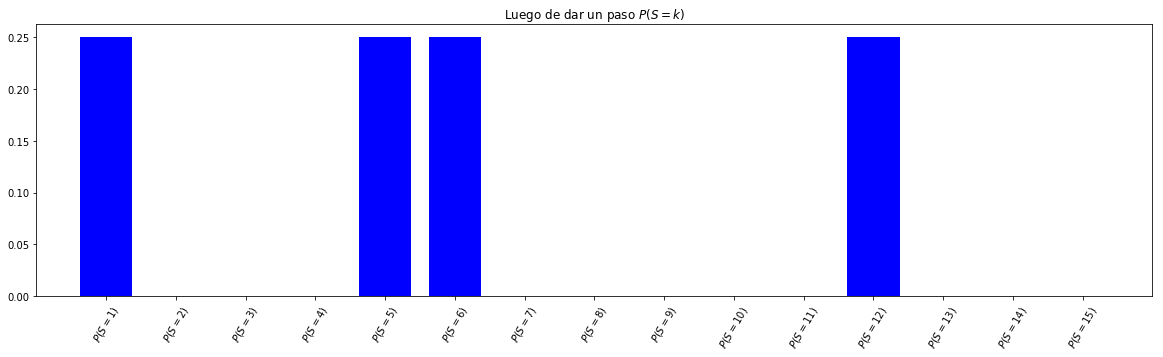

In [37]:
def take_step(P):
    P_updated = np.zeros(len(P))
    P_updated[1:] = P[:-1]
    P_updated[0] = P[-1]
    return P_updated
P_puerta_updated = take_step(P_puerta)
plot_bar_chart(P_puerta, title="Distribución original $P(S=k)$",index_str='$P(S=%s)$')
plot_bar_chart(P_puerta_updated, title="Luego de dar un paso $P(S=k)$",index_str='$P(S=%s)$')

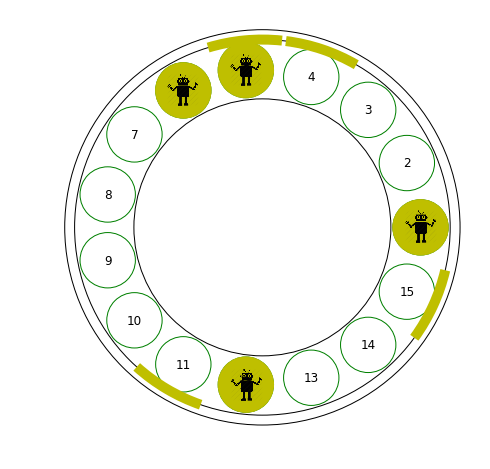

In [33]:
robot.plot_robot_room(loc = doors+1, N=N, doors = doors, figsize = (8,8))

Tenemos entonces la distribución a posteriori luego de avanzar:

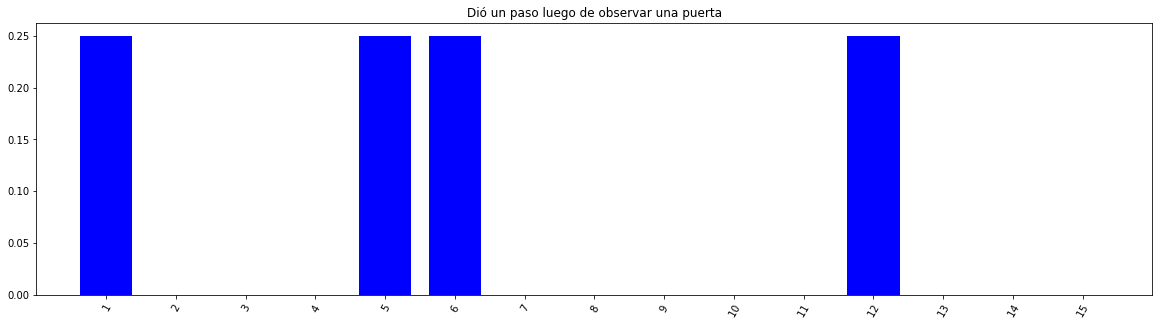

In [38]:
plot_bar_chart(P_puerta_updated, title="Dió un paso luego de observar una puerta",index_str='$%s$')

Ahora vuelve a observar una puerta luego de avanzar. Si me olvido de lo anterior la distribución luego de observar es la siguiente:

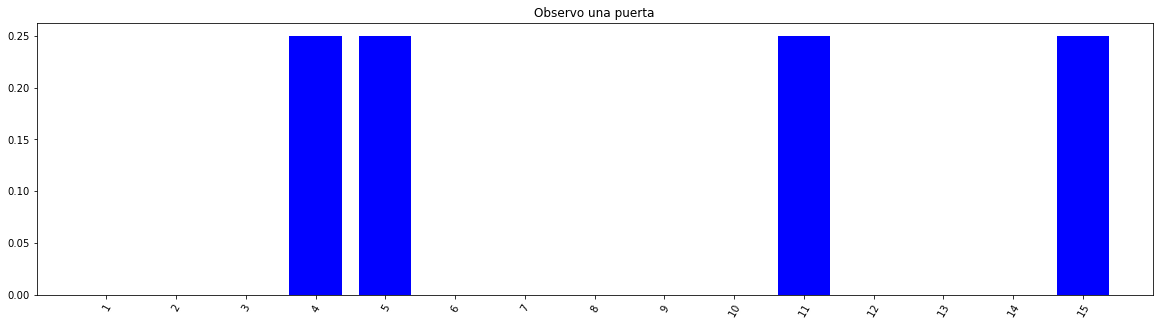

In [35]:
plot_bar_chart(P_puerta, title="Observo una puerta",index_str='$%s$')

En resumen: 
- Debido a la primer observación y al avance, el robot sabe que puede estar en 5, 6, 12 o 1
- Debido a la segunda observación luego de avanzar, el robot sabe que puede estar en 4, 5, 11 o 15
- ¿Tiene certeza el robot de donde se encuentra luego de estas dos observaciones?
- ¿Que operación se realizó?

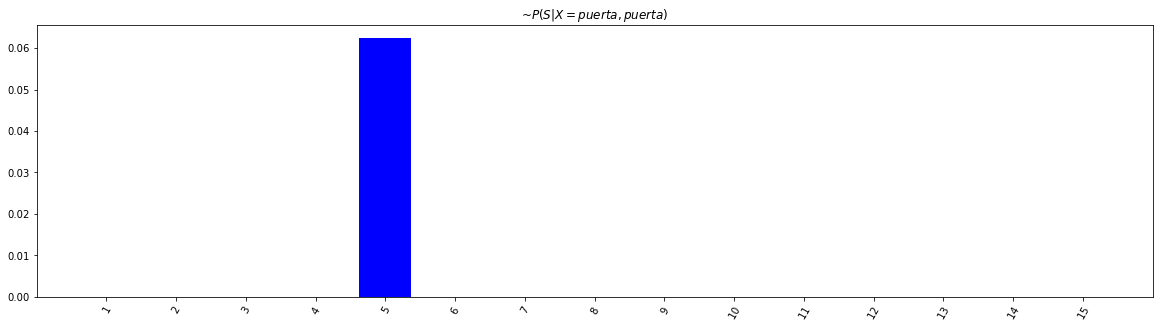

In [36]:
P_puerta_puerta_un = P_puerta*P_puerta_updated
plot_bar_chart(P_puerta_puerta_un, title="~$P(S|X={puerta,puerta})$", index_str='$%s$')

¿Y si observa la pared en su segunda observación?
- Debido a la primer observación y al avance, el robot sabe que puede estar en 5, 6, 12 o 1
- Debido a la segunda observación, el robot sabe que puede estar en 1, 2, 3, 6, 7, 8, 9, 10, 12, 13 o 14

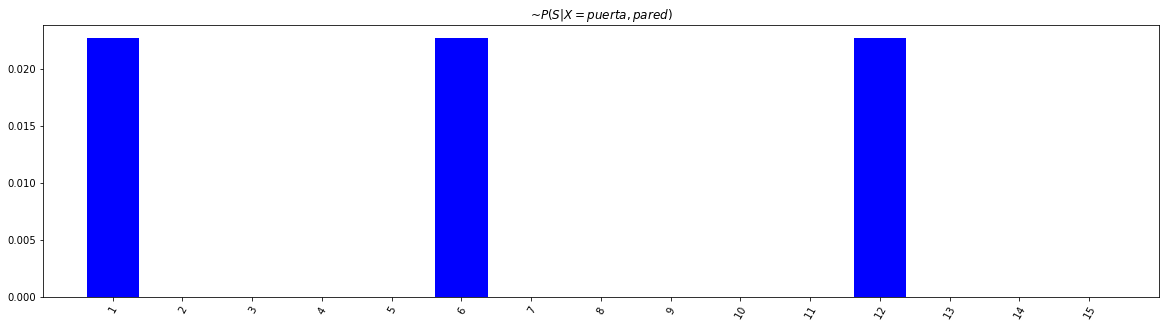

In [37]:
P_puerta_pared_un = P_pared*P_puerta_updated
plot_bar_chart(P_puerta_pared_un, title="~$P(S|X={puerta,pared})$", index_str='$%s$')

¿Qué problemas tienen las "funciones de masa de probabilidad" anteriores?

In [38]:
P_puerta_pared_un.sum()

0.068181818181818177

**Normailización**

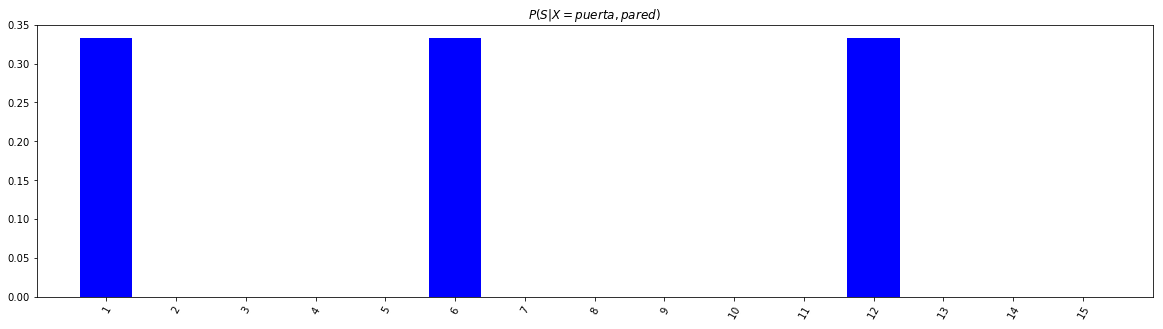

1.0

In [30]:
P_puerta_pared = P_puerta_pared_un/P_puerta_pared_un.sum()
plot_bar_chart(P_puerta_pared, title="$P(S|X={puerta,pared})$", index_str='$%s$')
P_puerta_pared.sum()

# Probabilidad conjunta, likelihood y probabilidad condicional

$P(X,S=k) = P(X|S=k)P(S=K) = P(S=k|X)P(X)$

$P(puerta,S=4) = P(puerta|S=4)P(S=4) = P(S=4|puerta)P(puerta)$

$P(puerta,S=4) = 1 \frac{1}{15} = \frac{1}{4} \frac{4}{15} = \frac{1}{15}$

$P(pared,S=4) = 0 \frac{1}{15} = 0 \frac{11}{15} = 0 $

$P(S=k|X) = \frac{P(X|S=k)P(S=K)}{P(X)}$

$P(S=4|puerta) = \frac{P(puerta|S=4)P(S=4)}{P(puerta)} = \frac{1 \frac{1}{15}}{\frac{4}{15}} = \frac{1}{4}$

# Teorema de Bayes

$ \large P(S=k|X) = \huge \frac{P(X|S=k)P(S=K)}{\sum_i{P(X|S_i)P(S_i)}}$

$\large Posteriori = \huge \frac{Likelihood \quad x \quad Priori}{Normalización}$

En nuestro ejemplo (suponiendo que observamos 2 puertas):

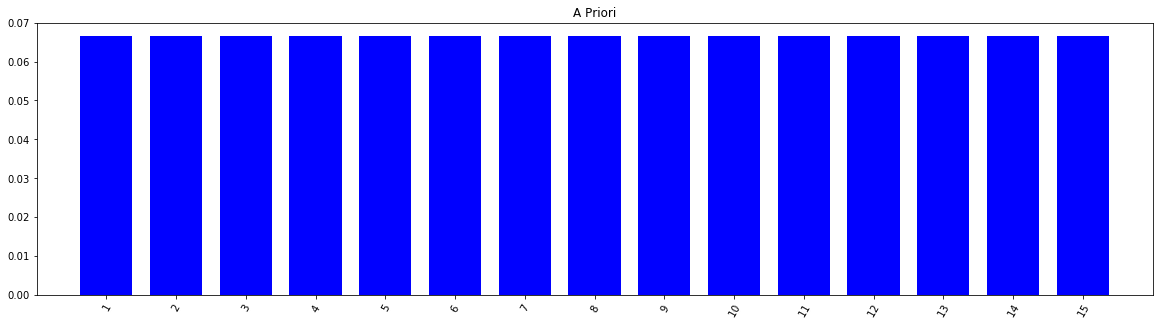

In [31]:
# Desconoce totalmente su posición
prior = np.ones(N)/N
plot_bar_chart(prior, title="A Priori", index_str='$%s$')

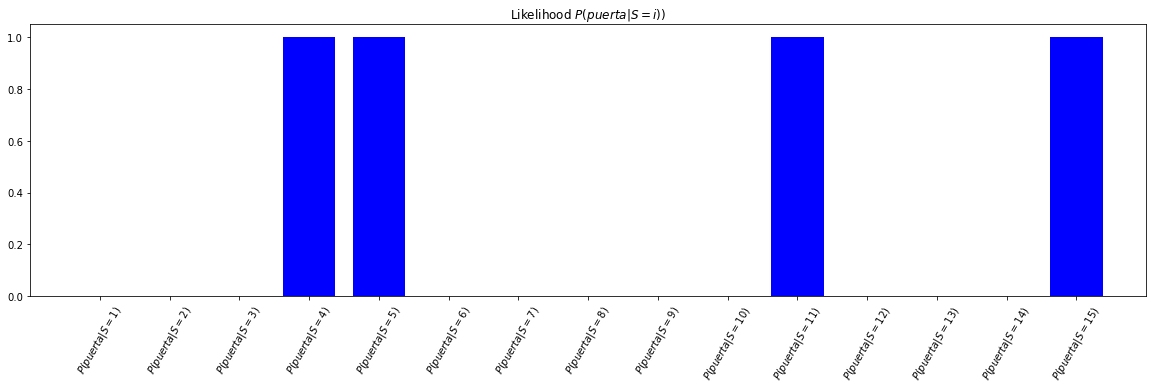

In [32]:
likelihood_puerta = np.zeros(N)
likelihood_puerta[doors-1] = 1
plot_bar_chart(likelihood_puerta, title="Likelihood $P(puerta|S=i))$",index_str='$P(puerta|S=%s)$')

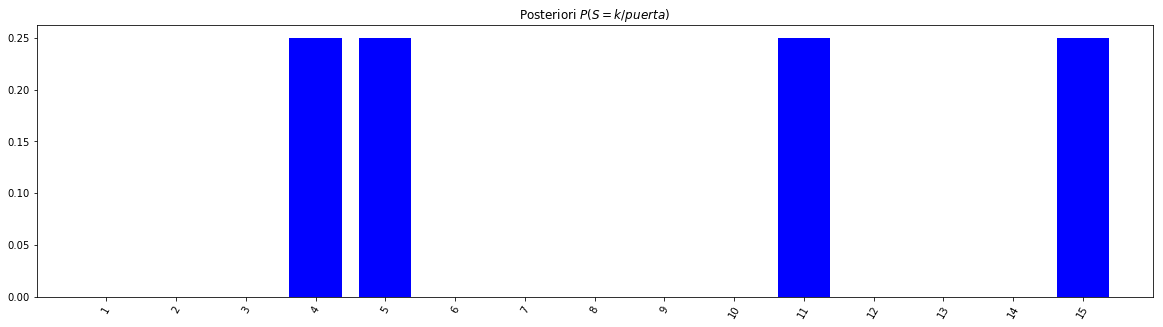

In [33]:
posteriori_un = likelihood_puerta*prior
# Normalización
posteriori = posteriori_un/posteriori_un.sum()
plot_bar_chart(posteriori, title="Posteriori $P(S=k/puerta)$",index_str='%s')

** Ahora avanza modificando la 'a posteriori' que pasa a ser la 'a priori' **

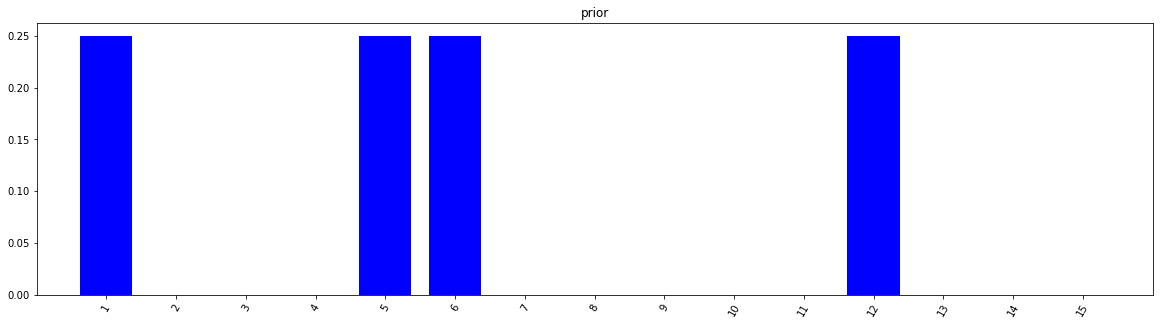

In [34]:
prior_2 = take_step(posteriori)
plot_bar_chart(prior_2, title="prior",index_str='%s')

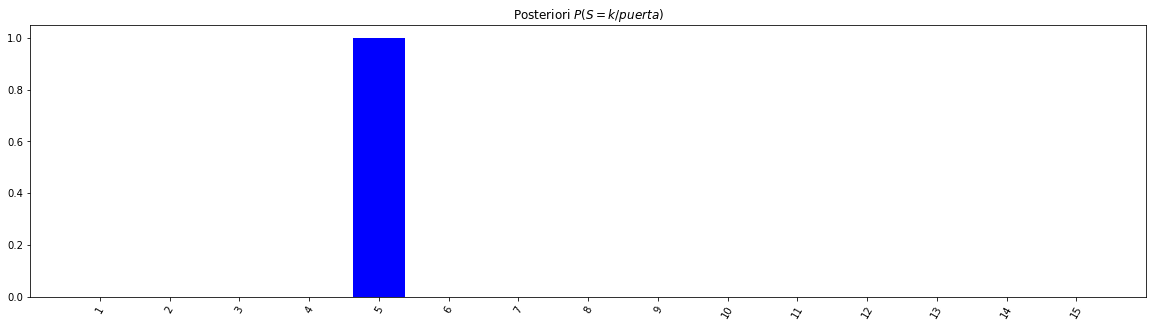

In [35]:
posteriori_un_2 = likelihood_puerta*prior_2
# Normalización
posteriori_2 = posteriori_un_2/posteriori_un_2.sum()
plot_bar_chart(posteriori_2, title="Posteriori $P(S=k/puerta)$",index_str='%s')

# Definimos el likelihood en este ejemplo

In [47]:
likelihood = {}
likelihood['puerta'] = likelihood_puerta
likelihood['pared'] = likelihood_pared

# Función de Update

In [43]:
def update_hist(likelihood, prior):
    posterior_un = likelihood*prior
    posterior = posterior_un/posterior_un.sum()
    return posterior

def get_robot_samples(initial_pos, doors, N_positions, N_samples):
    initial_pos = initial_pos - 1
    output = []
    for i in range(N_samples):
        actual_pos = (i+initial_pos)%N_positions + 1
        if actual_pos in doors:
            output.append('puerta')
        else:
            output.append('pared')
    return output

robot_sample = get_robot_samples(10, doors, N, 7)
print(robot_sample)

['pared', 'puerta', 'pared', 'pared', 'pared', 'puerta', 'pared']


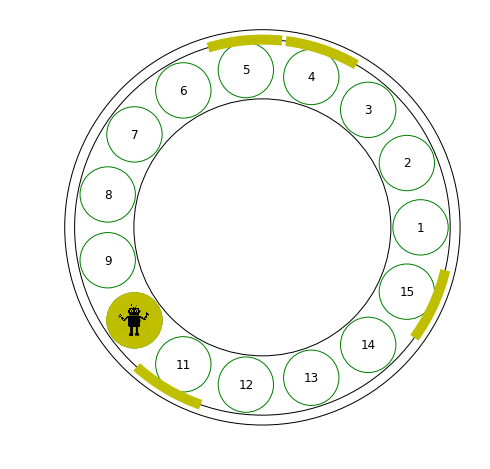

In [42]:
robot.plot_robot_room(loc = 10, N=N, doors = doors, figsize = (8,8))

# Problema 1: Localización del robot
Implementar función plot_and_get_robot_position_histogram en archivo problema_1.py, luego descomentar la linea de abajo para probar y verificar que funcione correctamente

**robot_samples**: una lista con lo que observa el robot. Ejemplo: ['puerta', 'puerta', 'pared', 'pared']

**likelihood**: un diccionario con el likelihood de la puerta y el likelihood de la pared. 

{'pared': array([ 1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
         1.,  0.]),
 'puerta': array([ 0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.])}
         
**return**: Devuelve un np.array con la distribución de probabilidades de la posición del robot ('belief')

**Nota**: La función no debería llevar más de 10 líneas de codigo

In [45]:
#from problema_1 import plot_and_get_robot_position_histogram
from helpers.helper import plot_and_get_robot_position_histogram

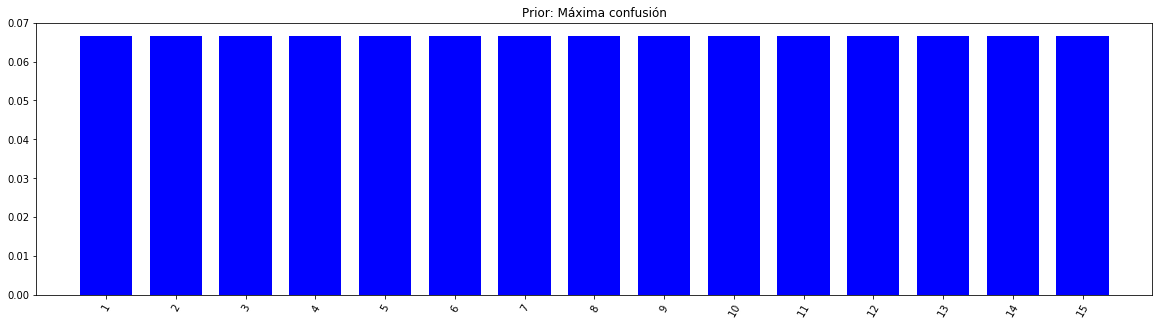

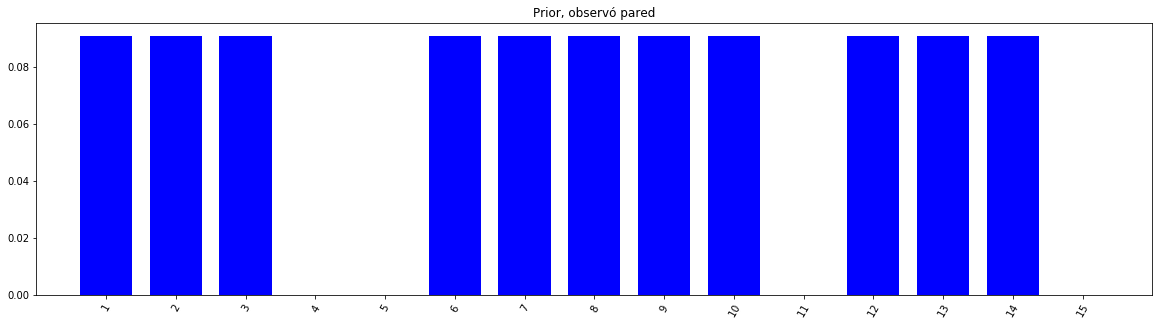

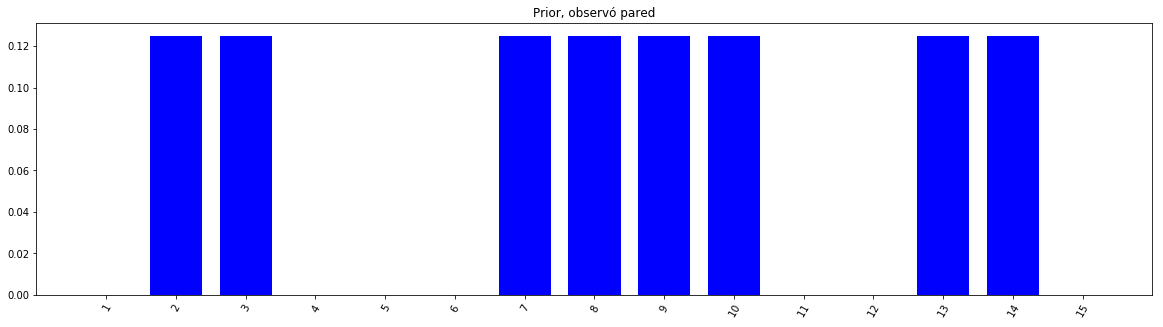

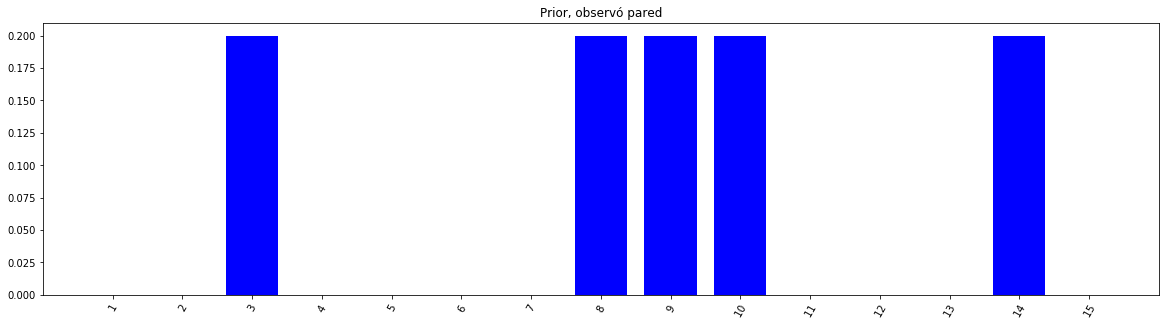

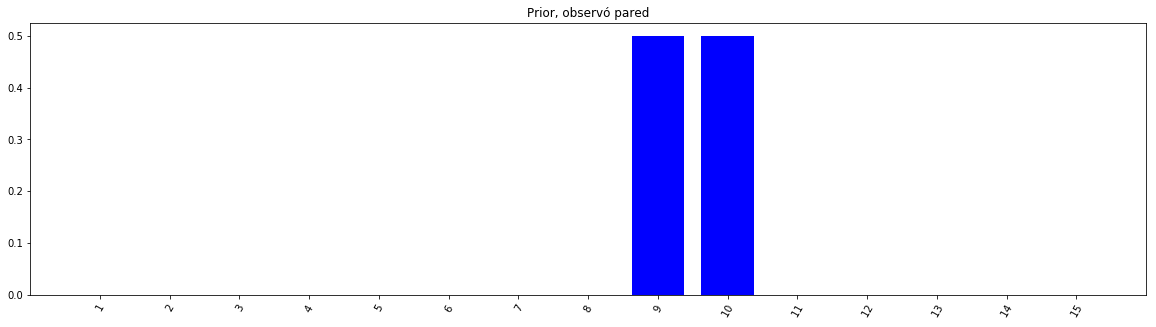

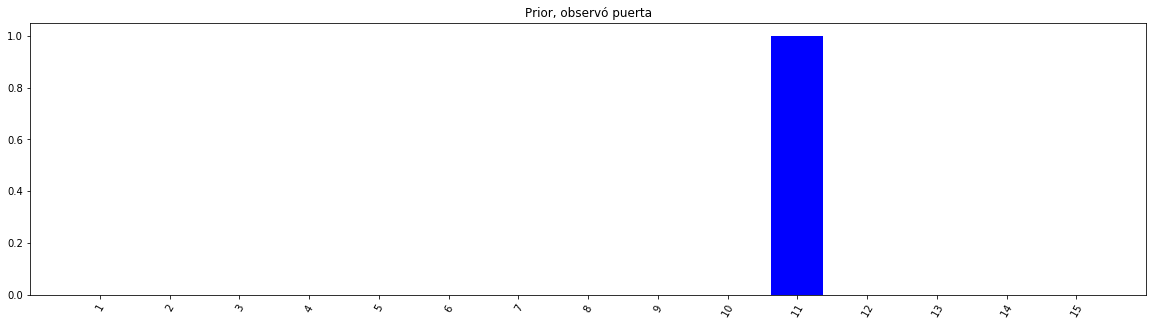

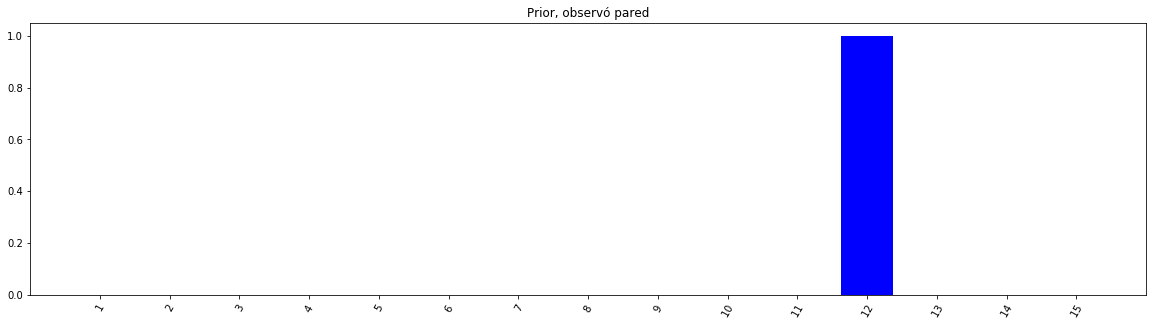

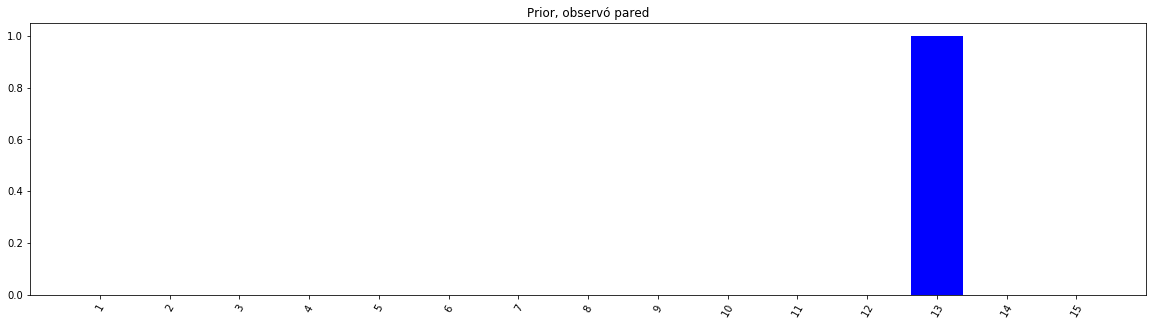

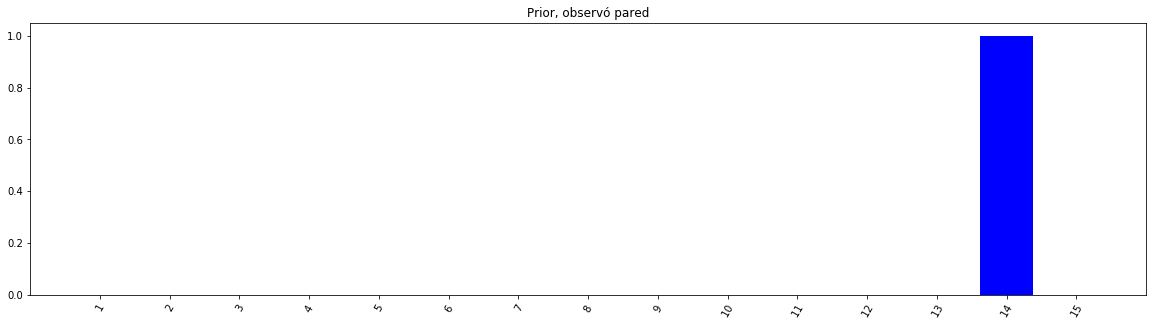

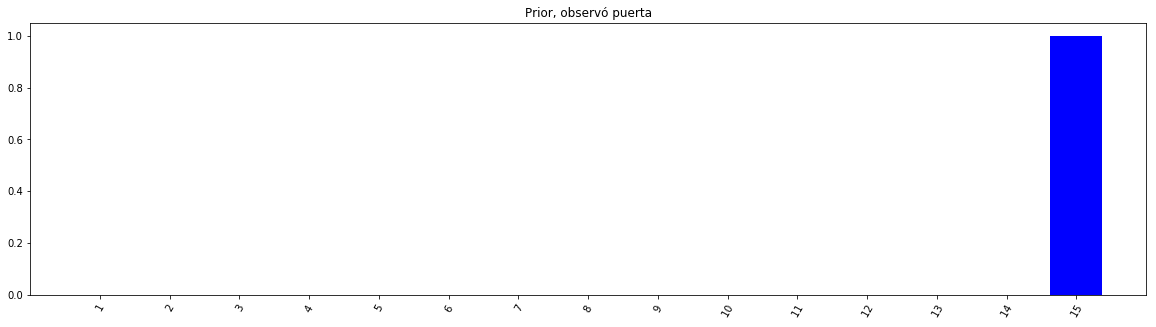

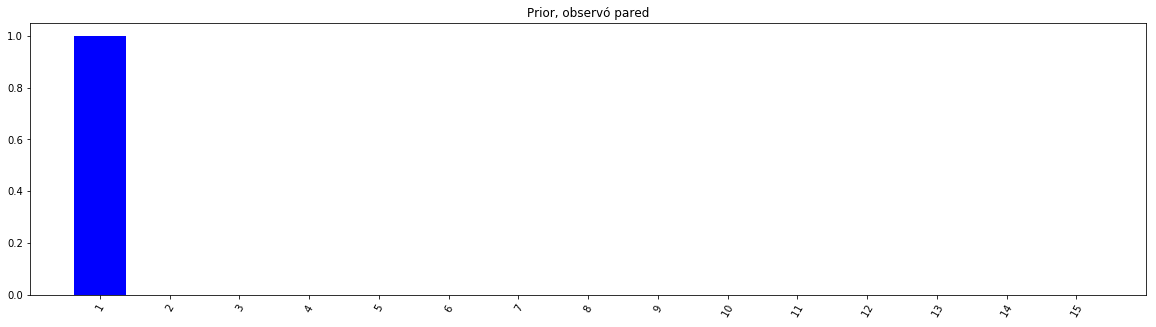

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

In [50]:
N_positions = 15
N_samples = 10
initial_position = 7
robot_samples = get_robot_samples(initial_position, doors, N_positions, N_samples)
plot_and_get_robot_position_histogram(robot_samples, likelihood)

¿Que pasa si el robot tiene un error al observar?

¿Y si tiene un error al caminar?